![COVER](https://pbs.twimg.com/media/FJAlvhlXMAEb65y?format=jpg&name=900x900)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Part 1: Data Preprocessing

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
# Check Working Directory
import os
os.getcwd()

'C:\\Users\\amira\\Data Science\\Semester 1\\Introduction to Image Processing and Computer Vision\\Projects\\Project 2\\Source Code'

### 1.1: Import Libraries

In [1]:
%matplotlib inline
import os
import cv2
import joblib
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage

### 1.2: Load, Resize and Take Only Ten Label Species Data

The source path will be created after unzipping the files to a folder. Next, we create a function that reads, resizes, and saves the data in a dictionary that includes the images, labels (Tree Species), original filenames, and a description. Numpy arrays containing the RGB values of the images are used to store them. Using joblib, the dictionary is stored to a pickle file. The data structure is similar to that used in scikit-test learn's data sets.

In [2]:
def resize_all(src, pklname, include, width=150, height=None):
    
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})Tree Species images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [3]:
# Source path of Image data
data_path = "C:\\Users\\amira\\Data Science\\Semester 1\\Introduction to Image Processing and Computer Vision\\Projects\\Project 2\\Source Code\\dataset\\images\\lab\\"
os.listdir(data_path)

['abies_concolor',
 'abies_nordmanniana',
 'acer_campestre',
 'acer_ginnala',
 'acer_griseum',
 'acer_negundo',
 'acer_palmatum',
 'acer_pensylvanicum',
 'acer_platanoides',
 'acer_pseudoplatanus',
 'acer_rubrum',
 'acer_saccharinum',
 'acer_saccharum',
 'aesculus_flava',
 'aesculus_glabra',
 'aesculus_hippocastamon',
 'aesculus_pavi',
 'ailanthus_altissima',
 'albizia_julibrissin',
 'amelanchier_arborea',
 'amelanchier_canadensis',
 'amelanchier_laevis',
 'asimina_triloba',
 'betula_alleghaniensis',
 'betula_jacqemontii',
 'betula_lenta',
 'betula_nigra',
 'betula_populifolia',
 'broussonettia_papyrifera',
 'carpinus_betulus',
 'carpinus_caroliniana',
 'carya_cordiformis',
 'carya_glabra',
 'carya_ovata',
 'carya_tomentosa',
 'castanea_dentata',
 'catalpa_bignonioides',
 'catalpa_speciosa',
 'cedrus_atlantica',
 'cedrus_deodara',
 'cedrus_libani',
 'celtis_occidentalis',
 'celtis_tenuifolia',
 'cercidiphyllum_japonicum',
 'cercis_canadensis',
 'chamaecyparis_pisifera',
 'chamaecyparis

In [5]:
# Apply the resize function and take only ten Labels Tree Species Data
base_name = 'Tree_Species_Recognition'
width = 80

# I take only 10 Lablel Species
include = {'abies_nordmanniana',
 'acer_campestre',
 'acer_ginnala',
 'acer_pensylvanicum',
 'amelanchier_canadensis',
 'castanea_dentata',
 'cercidiphyllum_japonicum',
 'evodia_daniellii',
 'robinia_pseudo-acacia',
 'ulmus_pumila'}
 
resize_all(src=data_path, pklname=base_name, width=width, include = include)

abies_nordmanniana
acer_campestre
acer_ginnala
acer_pensylvanicum
amelanchier_canadensis
castanea_dentata
cercidiphyllum_japonicum
evodia_daniellii
robinia_pseudo-acacia
ulmus_pumila


### 1.3: Summary of Images Data
Let’s load the data from disk and print a summary.

In [6]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  1155
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)Tree Species images in rgb
image shape:  (80, 80, 3)
labels: ['abies_nordmann' 'acer_campe' 'acer_gin' 'acer_pensylvan'
 'amelanchier_canade' 'castanea_den' 'cercidiphyllum_japon' 'evodia_danie'
 'robinia_pseudo-ac' 'ulmus_pu']


Counter({'abies_nordmann': 124,
         'acer_campe': 108,
         'acer_gin': 120,
         'acer_pensylvan': 120,
         'amelanchier_canade': 120,
         'castanea_den': 120,
         'cercidiphyllum_japon': 119,
         'evodia_danie': 80,
         'robinia_pseudo-ac': 124,
         'ulmus_pu': 120})

### 1.4: Visualize Images that we select in Label Species
The images below show an example of each Tree Species included.

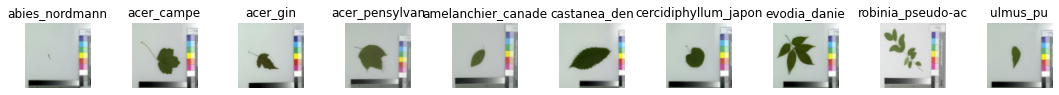

In [21]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

### 1.4: Define Predictor and Target Attribute
By convention, we name the input data X and result (labels) y.

In [22]:
X = np.array(data['data'])
y = np.array(data['label'])

In [23]:
X.shape

(1155, 80, 80, 3)

In [24]:
y.shape

(1155,)

### 1.5: Split  Data into Training and Testing
we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2 respectively.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

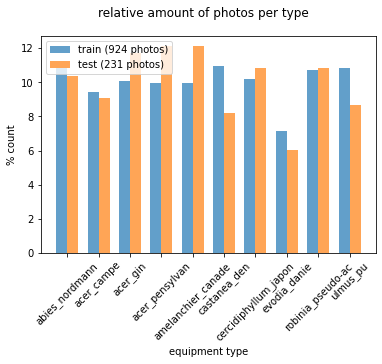

In [26]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

The distributions are not perfectly equal, but good enough for now.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Part 2: Feature Extraction

A classic approach to object recognition is HOG-SVM, which stands for Histogram of Oriented Gradients and Support Vector Machines. HOGs are used for feature reduction, in other words: for lowering the complexity of the problem, while maintaining as much variation as possible.

To calculate a HOG, an image is divided into blocks, for example 8 by 8 pixels. For each of these blocks, the magnitude of the gradient in a given number of directions is calculated [1]

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 2.1 Processing

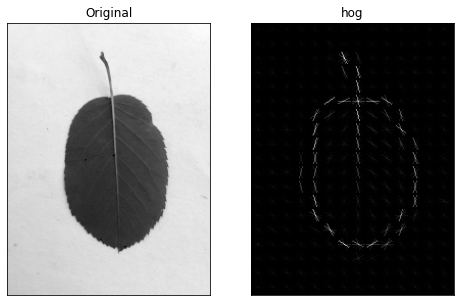

In [27]:
Image = imread('sample.jpg', as_gray=True)
 
# scale down the image to one third
Image = rescale(Image, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
Image_hog, Image_hog_img = hog(
    Image, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(Image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(Image_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [28]:
print('number of pixels: ', Image.shape[0] * Image.shape[1])
print('number of hog features: ', Image_hog.shape[0])

number of pixels:  53133
number of hog features:  8424


The number of data points to process in our model has been reduced to ~15%, and with some imagination we can still recognise a Leaf Image in the HOG.

### 2.2 Transformers
We used a transformation when calculating our HOG. We can use transformers to transform our entire data set. These are objects that accept an array of data, transform each item, and then return the transformed data.
We must first convert color photos to grayscale, then calculate their HOGs before scaling the data. RGB2GrayTransformer, HOGTransformer, and StandardScaler are used in succession for this. The output is an array containing a HOG for each image in the input.
Many built-in transformers are included in Scikit-learn, including a StandardScaler for scaling features and a Binarizer for mapping string features to numerical features. It also includes the BaseEstimator and TransformerMixin classes, which make creating your own Transformers easier.
By inheriting from these two classes and implementing a __init__, fit, and transform function, a custom transformer can be created. The fit transform method of the TransformerMixin class combines the fit and transform that we implemented.
The RGB2GrayTransformer and HOGTransformer are defined below.

In [29]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an ar ray of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

Note that for compatibility with scikit-learn, the fit and transform methods take both X and y as parameters, even though y is not used here.

With this, we are all set to preprocess our RGB images to scaled HOG features.

In [30]:
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(924, 576)


In [31]:
# tranform X_test as well
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Part 3: Experiment with Different Machine Learning Classifiers
Our Data is ready after feature extraction. Now it's time to build Machine Learning Classsifer to predict the result. And, we experiments with five different machine learning classifer as you can see below: 

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 3.1: Logistic Regression

In [39]:
# import the model from sklean
from sklearn.linear_model import LogisticRegression 

In [40]:
 # initialize the model
lg = LogisticRegression(random_state= 0)  

In [112]:
# fit the dataset into our classifier model for training
lg.fit(X_train_prepared, y_train)

In [82]:
# predict the result
lg_y_pred = lg.predict(X_test_prepared)

### 3.2: Support Vector Machine

In [83]:
# import svm model
from sklearn.svm import SVC

In [48]:
# init the model
svm = SVC(kernel = 'linear', random_state= 0)

In [49]:
# fit the data into model
svm.fit(X_train_prepared, y_train)

SVC(kernel='linear', random_state=0)

In [50]:
# predict the result
svm_y_pred = svm.predict(X_test_prepared)

### 3.3: Random Forest

In [51]:
# import the model from sklean
from sklearn.ensemble import RandomForestClassifier

In [55]:
# initialize the model
rf = RandomForestClassifier(n_estimators=11, criterion = 'entropy', random_state=0)    

In [56]:
# fit the dataset into our classifier model for training
rf.fit(X_train_prepared, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [84]:
# predict the result
rf_y_pred = rf.predict(X_test_prepared)

### 3.4: Decision Tree

In [58]:
# import the model from sklean
from sklearn.tree import DecisionTreeClassifier  

In [61]:
 # initialize the model
dt = DecisionTreeClassifier( criterion = 'entropy', random_state=0)

In [62]:
# fit the dataset into our classifier model for training
dt.fit(X_train_prepared, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
# predict the result
dt_y_pred = dt.predict(X_test_prepared)

### 3.5: Naive Bayes

In [77]:
# import the model from sklean
from sklearn.naive_bayes import GaussianNB 

In [78]:
# initialize the model
nb = GaussianNB()

In [79]:
# fit the dataset into our classifier model for training
nb.fit(X_train_prepared, y_train)

GaussianNB()

In [80]:
# predict the result
nb_y_pred = nb.predict(X_test_prepared)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Part 4: Result Evaluation

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 4.1 Accuracy Score

In [106]:
# Accuracy Score of  Classifiers that we implement
lg_acc = 100*np.sum(lg_y_pred == y_test)/len(y_test)
svm_acc = 100*np.sum(svm_y_pred == y_test)/len(y_test)
dt_acc = 100*np.sum(dt_y_pred == y_test)/len(y_test)
rf_acc = 100*np.sum(rf_y_pred == y_test)/len(y_test)
nb_acc = 100*np.sum(nb_y_pred == y_test)/len(y_test)
print("Logistic Regression", lg_acc)
print("Support Vector Machine", svm_acc)
print("Decision Tree", dt_acc)
print("Random Forrest", rf_acc)
print("Naive Bayes", nb_acc)

Logistic Regression 97.40259740259741
Support Vector Machine 98.7012987012987
Decision Tree 94.37229437229438
Random Forrest 94.37229437229438
Naive Bayes 92.20779220779221


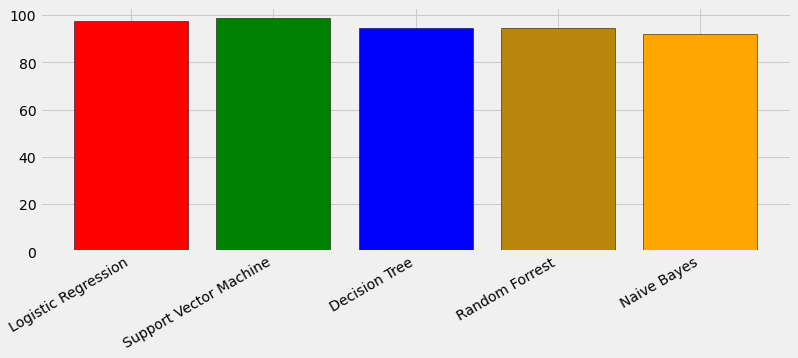

In [107]:
# Visulize the Result
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 5))
result = [lg_acc, svm_acc, dt_acc, rf_acc, nb_acc]
label = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forrest","Naive Bayes"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange']

plt.bar(label, result, color = colors, edgecolor='black')
plt.gcf().autofmt_xdate()

we experiment five different machine learning classfiers and as we can see SVM gave higher accuracy. So below you can see the confusion matrix result of SVM. Remember we did't use whole dataset we just use only 10 label tree species and this result is based on 10 label class that we use.

### 4.2 Confusion Metric
Confusion matrix result of 10 label class (Support Vector Machine)

In [43]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix= confusion_matrix(y_test, svm_y_pred)
print(confusion_matrix)

[[24  0  0  0  0  0  0  0  0  0]
 [ 0 20  1  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0]
 [ 0  1  0  0  0  0 23  0  0  1]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


The largest values are on the diagonal, hence most of the predictions are correct. To visualise this more clearly as an image, we do two things. First, we normalise the matrix to 100, by dividing every value by the sum of its row (i.e. the number of actual items with a specific label). Second, we set the main diagonal to 0 in order to focus on the wrong predictions.

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


 ['abies_nordmann', 'acer_campe', 'acer_gin', 'acer_pensylvan', 'amelanchier_canade', 'castanea_den', 'cercidiphyllum_japon', 'evodia_danie', 'robinia_pseudo-ac', 'ulmus_pu']


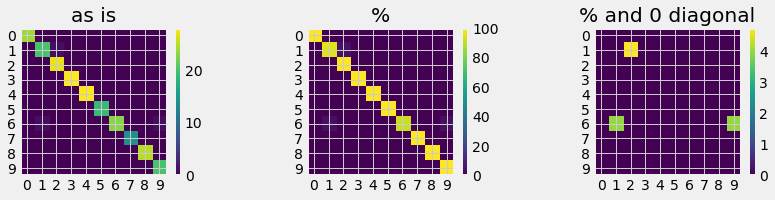

In [110]:
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(confusion_matrix)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Remarks: 
Thank you `Dr. RAFAŁ JÓŹWIAK` for assigning such a wonderful project on tree species recognition. The dataset is not so complicated to understand. And the biggest challenge in this project is to apply the Feature Extraction technique on all images. But it was very interesting for me to learn such technique like HOG and different ML classifers. I really enjoyed it to finish it and I try my best to do it.
